# Grin Scooters


<img src="grin1.jpg">

<img src="grin.jpg">

## Data Exploration

* Connect to the database using your favorite programming tool

Since the dataset is in in PostgreSQL, we import the library psycopg2 in order to do the query.

In [1]:
import psycopg2

The connection keys are:

In [2]:
host_ = 'grin-technical-test.crf3v8rvj0hp.us-east-1.rds.amazonaws.com'
data = 'postgres'
user_ = 'grin_technical_challenge'
psw = 'kjbaskc24bkjhb354bbjk'
port_ = 5432

First, because we don't even have the tables' names, we have to acquire them using the following code:

In [3]:
conn = psycopg2.connect(database = data,
                        user = user_, 
                        password = psw, 
                        host = host_, 
                        port = port_) 

cursor = conn.cursor()

postgreSQL_select_Query = "SELECT table_name FROM information_schema.tables  
WHERE table_schema='public' 
AND table_type='BASE TABLE'; "

cursor.execute(postgreSQL_select_Query)   
name_of_tables = cursor.fetchall() 
print(name_of_tables)

cursor.close()
conn.close()

[('open_app',), ('rides',)]


Now, with the tables' names we can perfom the query. Let's start with the open_ap table:

In [4]:
conn = psycopg2.connect(database = data,
                        user = user_, 
                        password = psw, 
                        host = host_, 
                        port = port_) 

cursor = conn.cursor()
postgreSQL_select_Query = "SELECT * FROM open_app;"
cursor.execute(postgreSQL_select_Query)   
open_app = cursor.fetchall()
cursor.close()
conn.close()

In [5]:
open_app[0]

(4830703,
 datetime.datetime(2018, 9, 1, 6, 29, 25, 861397),
 -46.537167,
 -23.431097,
 815303.0)

This is a list of numerical values only, we also need the name of the columns:

In [6]:
conn = psycopg2.connect(database = data,
                        user = user_, 
                        password = psw, 
                        host = host_, 
                        port = port_) 

cursor = conn.cursor()
postgreSQL_select_Query = "SELECT column_name FROM information_schema.columns
WHERE table_schema = 'public' 
AND table_name   = 'open_app' "

cursor.execute(postgreSQL_select_Query)   
name_of_columns = cursor.fetchall()
print(name_of_columns)
cursor.close()
conn.close()

[('id',), ('open_time',), ('starting_lng',), ('starting_lat',), ('user_id',)]


With the columns' names we can perform the list to Dataframe transformation so we import numpy and pandas libraries.

In [7]:
import numpy as np
import pandas as pd

Converting the list into a DataFrame object:

In [8]:
open_app = pd.DataFrame(open_app, 
                        columns= ['id', 'open_time', 'starting_lng', 'starting_lat', 'user_id'])

Analogously with the other table (rides):

In [9]:
conn = psycopg2.connect(database = data,
                        user = user_, 
                        password = psw, 
                        host = host_, 
                        port = port_) 

cursor = conn.cursor()
postgreSQL_select_Query = "SELECT * FROM rides;"
cursor.execute(postgreSQL_select_Query)   
rides = cursor.fetchall()
cursor.close()
conn.close()

In [10]:
conn = psycopg2.connect(database = data,
                        user = user_, 
                        password = psw, 
                        host = host_, 
                        port = port_) 

cursor = conn.cursor()
postgreSQL_select_Query = "SELECT column_name FROM information_schema.columns WHERE table_schema = 'public' AND table_name   = 'rides' "
cursor.execute(postgreSQL_select_Query)   
name_of_columns = cursor.fetchall()
print(name_of_columns)
cursor.close()
conn.close()

[('id',), ('open_app_id',), ('start_time',), ('finish_time',), ('starting_lng',), ('starting_lat',), ('dest_lng',), ('dest_lat',), ('price',), ('user_id',), ('scooter_id',)]


In [11]:
rides = pd.DataFrame(rides, 
                     columns= ['id', 'open_app_id', 'start_time',
                               'finish_time', 'starting_lng',
                              'starting_lat', 'dest_lng', 
                              'dest_lat', 'price', 
                              'user_id', 'scooter_id'])

Since we have both tables as DataFrames we finally can analyze them.
We convert the dataframes into a pkl in order to don't have to do the query again:

In [1]:
# rides.to_pickle("./rides.pkl")
# open_app.to_pickle("./open_app.pkl")

* Tell us more about the data structure; describe in a less than 50 words what
each table is measuring

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
open_app =pd.read_pickle('open_app.pkl')
rides = pd.read_pickle('rides.pkl')

In [3]:
open_app.head()

,id,open_time,starting_lng,starting_lat,user_id
0,3888850,2018-08-26 04:36:28.682277,-46.585731,-23.754995,845777.0
1,3943906,2018-08-26 10:35:59.760495,-46.742086,-23.493399,732097.0
2,4094465,2018-08-27 19:19:26.922916,-46.739258,-23.526452,334289.0
3,4130533,2018-08-27 23:32:27.570050,-46.723822,-23.572924,779958.0
4,4157539,2018-08-28 02:50:19.400894,-46.696449,-23.552547,505242.0


In [4]:
rides.head()

,id,open_app_id,start_time,finish_time,starting_lng,starting_lat,dest_lng,dest_lat,price,user_id,scooter_id
0,719711,7588897,2018-09-16 16:24:17.161804,2018-09-16 16:51:43.161804,-46.550031,-23.739357,-46.485493,-23.808291,25.35,1373285.0,116087
1,719712,7590021,2018-09-16 16:21:31.183581,2018-09-16 16:46:53.183581,-46.345575,-23.492157,-46.322896,-23.422203,17.76,1211339.0,57644
2,719713,7609779,2018-09-16 18:52:01.797768,2018-09-16 19:16:28.797768,-46.496463,-23.584309,-46.519897,-23.586216,10.19,83990.0,113762
3,719714,7616300,2018-09-16 19:50:31.519219,2018-09-16 20:00:55.519219,-46.536555,-23.638103,-46.530030,-23.643579,6.00,239045.0,98660
4,719715,7624073,2018-09-16 20:19:36.477121,2018-09-16 20:37:21.477121,-46.811876,-23.527277,-46.804958,-23.549654,8.00,402570.0,41382


### Open App Table

Shows location (in terms of longitude and latitude) and time when an user open the app on his/her cellphone. 

### Rides Table

Shows rides realized on scooter by users, start and finish time, longitude and latitude at the begining and in the end of the ride, price of the ride, the scooter id and also the open app id.

* What is the % of open apps that had a ride per day? What does this metric mean
or represent for the company?

Each row in the open_app table stands for one time an user opened the app and each column in the rides table stands for one time a scooter was used. To know the TOTAL percentage of open apps that had a ride we merely need to divide the number of rows in each table and multiply the result by 100:

In [5]:
print('The Percentage of open apps that had a ride in all the dataset is %1.1f' %(rides.shape[0]/open_app.shape[0]*100) + ' percentage')

The Percentage of open apps that had a ride in all the dataset is 66.4 percentage


However this is the overall efficiency and we were asked for the efficiency per day. We ought to do some transformations in the start_time and open_time columns in order to achieve it.

First we have to drop the hour and stay only with the date:

In [6]:
open_app['open_time'] = pd.DatetimeIndex(open_app['open_time']).strftime("%Y-%m-%d")
open_app.head()

,id,open_time,starting_lng,starting_lat,user_id
0,3888850,2018-08-26,-46.585731,-23.754995,845777.0
1,3943906,2018-08-26,-46.742086,-23.493399,732097.0
2,4094465,2018-08-27,-46.739258,-23.526452,334289.0
3,4130533,2018-08-27,-46.723822,-23.572924,779958.0
4,4157539,2018-08-28,-46.696449,-23.552547,505242.0


The last operation converted our column in strings, so we have to turn it into a datetime again:

In [7]:
open_app['open_time'] = pd.to_datetime(open_app['open_time'])
open_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045654 entries, 0 to 4045653
Data columns (total 5 columns):
id              int64
open_time       datetime64[ns]
starting_lng    float64
starting_lat    float64
user_id         float64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 154.3 MB


Repeating the same process with the rides2 dataset:

In [8]:
rides['start_time'] = pd.DatetimeIndex(rides['start_time']).strftime("%Y-%m-%d")
rides['start_time'] = pd.to_datetime(rides['start_time'])
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684712 entries, 0 to 2684711
Data columns (total 11 columns):
id              int64
open_app_id     int64
start_time      datetime64[ns]
finish_time     datetime64[ns]
starting_lng    float64
starting_lat    float64
dest_lng        float64
dest_lat        float64
price           float64
user_id         float64
scooter_id      int64
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 225.3 MB


Once we have the date format Year-Month-Day we can groupby date and count the number of rides and open apps respectively:

In [9]:
t = rides.groupby('start_time').id.count()
number_of_rides = pd.Series.to_frame(t)
number_of_rides.rename(columns={'id': 'number_of_rides'}, inplace = True)
number_of_rides.head()

,number_of_rides
start_time,
2018-01-21,1
2018-01-23,1
2018-01-24,1
2018-01-25,1
2018-01-26,5


In [10]:
t = open_app.groupby('open_time').id.count()
number_of_open = pd.Series.to_frame(t)
number_of_open.rename(columns={'id': 'number_of_open_apps'}, inplace = True)
number_of_open.head()

,number_of_open_apps
open_time,
2018-01-21,1
2018-01-23,1
2018-01-24,1
2018-01-25,1
2018-01-26,5


Finally we aglomerate the results in a single table and show the first thirty registers:

In [11]:
number_of_open['number_of_rides'] = number_of_rides.number_of_rides
number_of_open['Percentage of rides per open app'] = (number_of_rides['number_of_rides']/number_of_open['number_of_open_apps']) * 100
result = number_of_open
result.head(30)

,number_of_open_apps,number_of_rides,Percentage of rides per open app
open_time,,,
2018-01-21,1,1,100.000000
2018-01-23,1,1,100.000000
2018-01-24,1,1,100.000000
2018-01-25,1,1,100.000000
2018-01-26,5,5,100.000000
2018-01-27,5,5,100.000000
2018-01-28,7,7,100.000000
2018-01-29,8,8,100.000000
2018-01-30,27,27,100.000000


This is an efficiency metric for the company, increasing this number will lead the company to greater profits so this should be one of the main targets.

* What is the missing piece of data (or table) that we would require to calculate
or find the Balance of the supply/demand equation:

Balance = Supply - Demand 

In this case, supply refers to the number of scooters available. The only way to know something about this number is using the column scooter_id column of the rides table. Let's review this column:

In [12]:
print('The maximum value in scooter_id es %i' %rides.scooter_id.max() +' and the minimun is %i' %rides.scooter_id.min())

The maximum value in scooter_id es 118392 and the minimun is 1


Let's count the number of scooter that were used in 2018 using the nunique function:

In [13]:
print('Number of scooters in 2018 was: %i' %rides.scooter_id.nunique())

Number of scooters in 2018 was: 105064


So we have 105064 scooters in the dataset which may conform the supply. We must say this seems to be merely the number of scooters that the company has bought through time so it doesn't neccesary imply all the scooters in the scooter_id are still available, they could be lost or broken. Also it could be possible that a scooter id number change after being repair so using the column scooter_id does not provide us with information about how many scooters the company owns at the moment. To do a more appropriate calculation of the supply we would need further information.   

Regarding to the demand we could stimate it as a function of time and location, because it will be different according to the hour of the day and also acoording to the place, but, for doing that, we would need more data and to get it we would need to do a market research.

In a more sophisticated model, owing to the fact that the disponibility of scooter will change according to the place and hour, we should consider also the supply as a function of time and location and treat the problem as a per-zones-problem. 

## Solving the Problem

* The problem is that we have no idea where to place scooters according to the user demand. Using the database above please create a model that can generate an output with a strong insight that can tell us where to place scooters.

Actually we have two problems here. One: Where to place the scooters to maximize its likelihood to be used and Two: Where will the user leave the scooter after using it?

For solving problem One we shall use the open_app table. A user opening the app, excluding those who has just downloaded it and are testing it which must be the less, is looking for a scooter nearby so, using the columns starting_lng and starting_lat we can exactly locate the place where the scooter is needed. By doing a clustering with k-means we can delimited a circular area of the location where the scooters are needed the most.

And with respect to problem Two we proceed the same way but with data in the rides table, because now we want to know the better place to park the scooter after using it, but first we may star with the exploratory descriptive analysis.

### Exploratory Descriptive Analysis 

We begin exploring the number of rides done and the money earned by the company by those as a function of time:

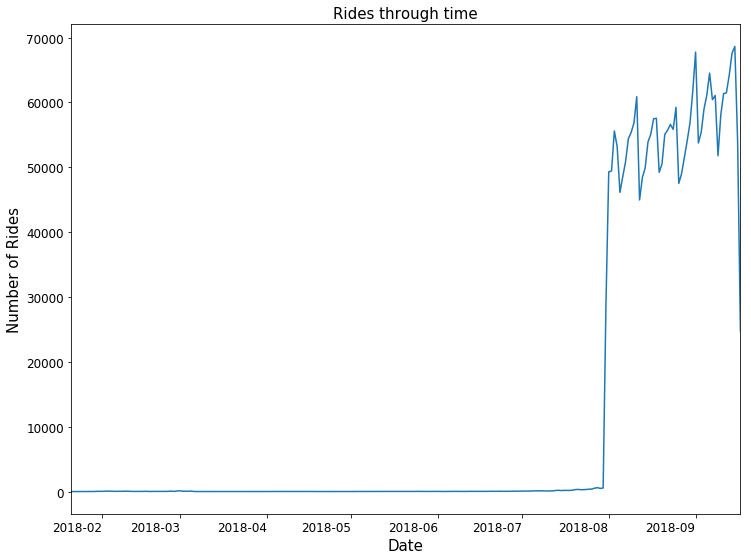

In [14]:
t = rides.groupby('start_time').id.count()

plt.figure(figsize = (12,10))
t.plot()
plt.title('Rides through time', fontsize = 15)
plt.ylabel('Number of Rides', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

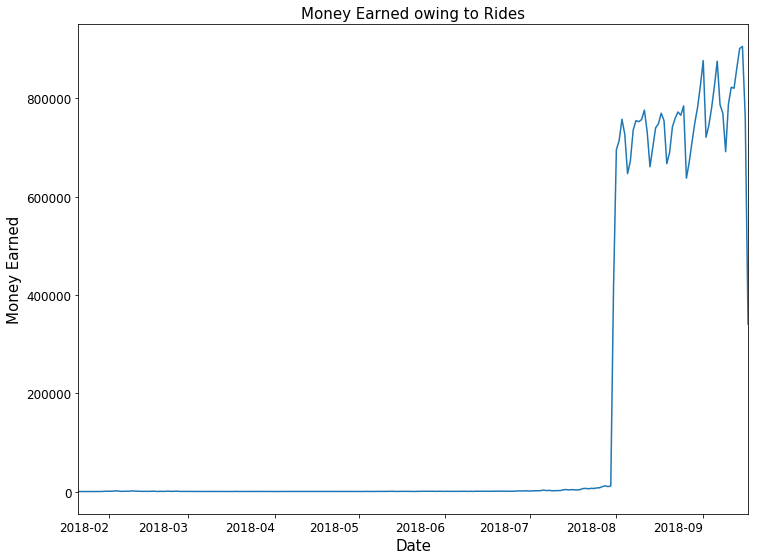

In [15]:
t = rides.groupby('start_time').price.sum()

plt.figure(figsize = (12,10))
t.plot()
plt.title('Money Earned owing to Rides', fontsize = 15)
plt.ylabel('Money Earned', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

Both graphs are similar as they should. Let's notice something import here. From the graph it seems that the company started operations in 2018-02 and for months remained doing almost not money and no rides. Then, in 2018-08 we have a dramatic change, because we pass from a few rides to 60 thousand. So, for the sake of this project, we should use only the data from 2018-08 and 2018-09 because the current business tendency is what we want to know and not those months of "trial and error", so let's filter only the dates from 2018-08 to 2018-09 in the rides dataframe: 

In [16]:
rides = rides.set_index(pd.DatetimeIndex(rides['start_time']))
df_rides = rides['2018-8' : '2018-9']

In [17]:
df_rides.drop('start_time', axis = 1, inplace = True)

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Let's see if the number of open apps has the same behavior:

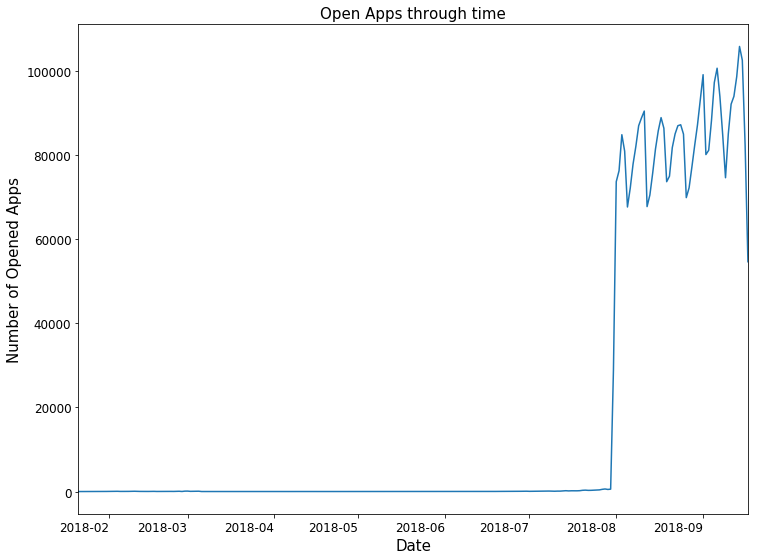

In [19]:
t = open_app.groupby('open_time').id.count()

plt.figure(figsize = (12,10))
t.plot()
plt.title('Open Apps through time', fontsize = 15)
plt.ylabel('Number of Opened Apps', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

We have the same behavior indeed so we proceed the same way as before:

In [20]:
open_app = open_app.set_index(pd.DatetimeIndex(open_app['open_time']))
df_open = open_app['2018-8' : '2018-9']

Let's check again the data. Since all the three graphs behave similar, it will be enough to check out one: 

In [21]:
df_rides.columns

Index(['id', 'open_app_id', 'finish_time', 'starting_lng', 'starting_lat',
       'dest_lng', 'dest_lat', 'price', 'user_id', 'scooter_id'],
      dtype='object')

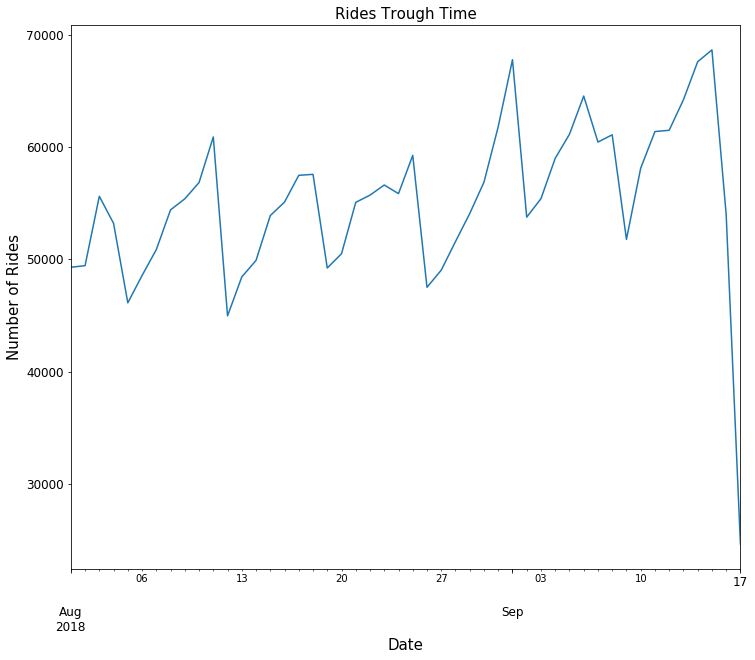

In [22]:
t = df_rides.groupby('start_time').id.count()

plt.figure(figsize = (12,10))
t.plot()
plt.title('Rides Trough Time', fontsize = 15)
plt.ylabel('Number of Rides', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

We have an interesting pattern here. Four times in August we had a minimum of rides, so obviously there's a day of the week where users tend not to use a scooter, probably that day is Sunday. Now, at September the 17th the number of rides is extemely low, this must be attributed to when the query was perfomed. It's likely that the query was performed before the day was done so there where not enough data to collect resulting in the strange pattern we can see in the graph.

Everything seems to be fine with our new dataframe. We continue with the Exploratory Descriptive Analyzis looking at the price's distribution in the dataframe df_rides:

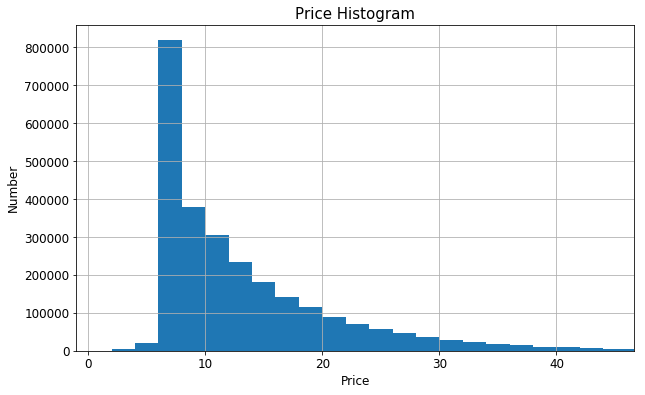

In [23]:
plt.figure(figsize=(10,6))
df_rides.price.hist(bins = 50)
plt.title('Price Histogram', fontsize = 15)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Number', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(-1, df_rides.price.quantile(0.99));

In [24]:
df_rides.price.describe()

count    2.645847e+06
mean     1.357987e+01
std      8.824994e+00
min      0.000000e+00
25%      7.230000e+00
50%      1.054000e+01
75%      1.650000e+01
max      1.000000e+02
Name: price, dtype: float64

Since the main objective of this project are the latitud and longitude variables, let's work with them:

Making the graph latitude vs longitude of the df_open we get the following:

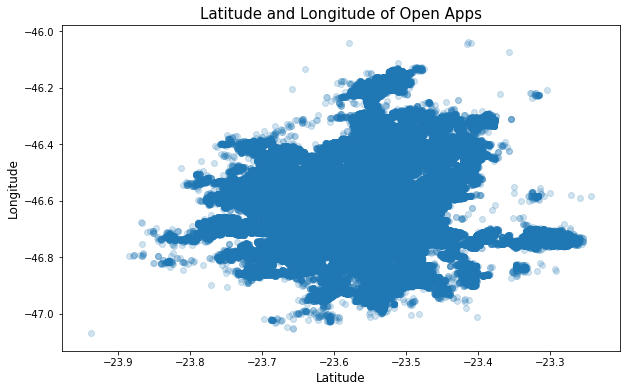

In [25]:
plt.figure(figsize = (10,6))
plt.title('Latitude and Longitude of Open Apps', fontsize = 15)
plt.scatter(df_open.starting_lat,df_open.starting_lng, alpha = 0.2)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Longitude', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

Repeating the same process with df_rides:

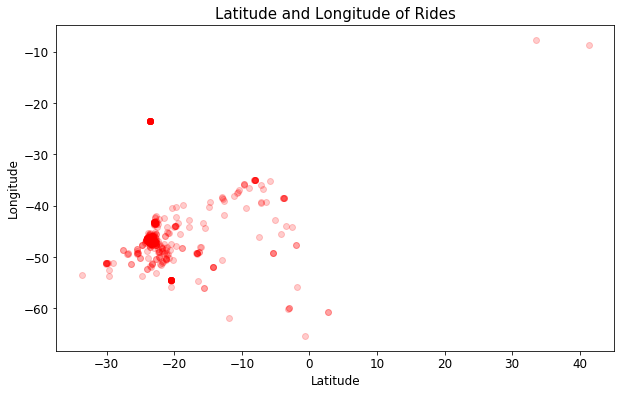

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(df_rides.dest_lat, df_rides.dest_lng, color = 'red', alpha = 0.2)
plt.title('Latitude and Longitude of Rides', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Longitude', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

The Latitude and Longitude of Rides graph is quite strange, meanwhile the Open App graph Longitude and Latitude goes from -47 to -46 and from -23.9 to -23.3 respetively the rides graph has latitudes of zero and longitudes of -10. Is this wrong? Would these data be outliers? Even tough this looks pretty weird, we are not acquainted to the longitude and latitude language so let's transform this coordinates to something that makes more sense to us: the distance between two geographic coordinates. 

The Haversine formula takes into account the spherical geometry of Earth and can be calculated using the following python function:

In [27]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

Adding the new column 'distance' to the df_rides data frame:

In [28]:
df_rides['distance'] = df_rides.apply(lambda row: haversine(row['starting_lng'], row['starting_lat'],
                                                             row['dest_lng'],row['dest_lat']), axis=1)

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Sorting the values by distance we get the following list:

In [29]:
df_rides.sort_values('distance', ascending = False).distance.head(20)

start_time
2018-09-16    8199.730513
2018-09-13    7597.213942
2018-09-11    3304.498246
2018-09-02    3299.306712
2018-09-16    3242.662871
2018-08-04    2698.728552
2018-09-06    2696.666285
2018-08-11    2693.269398
2018-08-22    2623.829355
2018-09-11    2385.524973
2018-08-31    2385.524973
2018-09-03    2383.855814
2018-08-18    2373.416532
2018-08-26    2361.689881
2018-08-26    2356.658347
2018-09-03    2355.815278
2018-08-29    2354.951135
2018-08-21    2353.269519
2018-08-06    2352.589762
2018-08-02    2352.549343
Name: distance, dtype: float64

This distance is measured in km and considering that the Earth radius is about 6371 km the data at the top of the list are huge outliers maybe resulting from the a GPS malfunction.

Introducing some random data from the open_app dataframe to Google Maps we discover these are data from Sao Paolo, Brazil. According to Google, the area of Sao Paola is 1521 square kilometers taking the square root of that number we get 39 km. Let's impose a thereshold of 30 km and let's say that any ride with a distance greater than 30 km is an outlier. Filtering the data to avoid this values:

In [30]:
df_rides = df_rides[df_rides.distance < 30]

Let's plot again the latitude-longitude graph to find out if we succed:

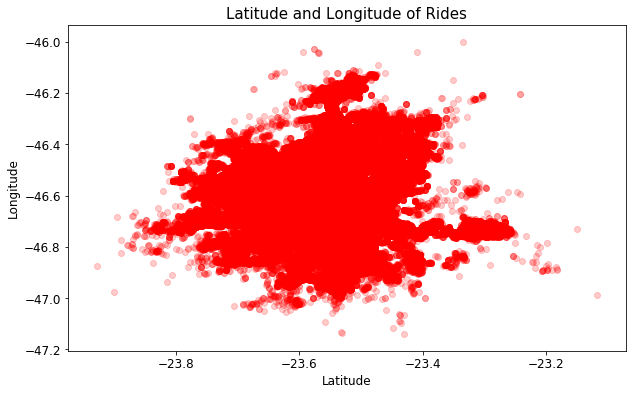

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(df_rides.dest_lat, df_rides.dest_lng, color = 'red', alpha = 0.2)
plt.title('Latitude and Longitude of Rides', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Longitude', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

Clearly longitude and latitude of open_app and rides are now in the same range. We are ready to Machine Learning.

### Problem One: Where to place the scooters to maximize its likelihood to be used

As we point at the beginning, we are going to use k-means to agrupate the data and determine where to place the scooters. For the df_open dataframe the plan is to place the scooter anywhere inside the circle created by the algorithm's centroid. With no further explainations let's implement the algorithm. 

First, to reduce the processing time we will get a sample of the 20% of the total data with the sample function:

In [32]:
df_open20 = df_open.sample(frac=0.2)
X = df_open20[['starting_lat', 'starting_lng']].values

Now we import the KMeans function and use the elbow method to calculate the number of clusters:

In [33]:
from sklearn.cluster import KMeans

In [34]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0,
                   n_jobs = -1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

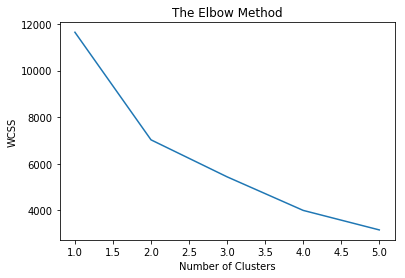

In [35]:
plt.plot(range(1,6), wcss)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

We can clearly see an elbow at Number of Clusters equal to 2 and a slight elbow at Number of clusters equal to 4. Let's try with 2 and then with 4 clusters.

In [36]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', 
                max_iter = 300, n_init = 10, 
                random_state = 0, n_jobs = -1)
y_kmeans = kmeans.fit_predict(X)
c_open2 = kmeans.cluster_centers_

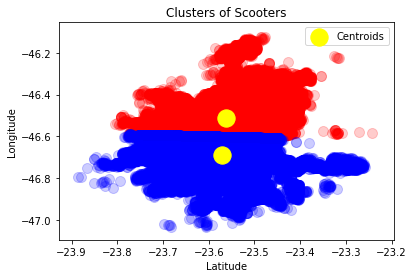

In [37]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', alpha = 0.2)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', alpha = 0.2)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Scooters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

We only have two clusters and the centroids seems to be very close each other, are they? Let's calculate the distance between centroids with the Haversine function. The centroids' coordinates are:

In [41]:
print('Distance between centroids is %1.2f' %haversine(c_open2[0,1], c_open2[0,0], c_open2[1,1], c_open2[1,0])+ 'km')
print('Centroids are not close each other')

Distance between centroids is 17.60km
Centroids are not close each other


According to this simple model, we should prioritize the scooters' supply near these 2 centroids, but taking into account the business problem, it is not useful to have only two places to put the scooters in, we clearly need more.

If we use 4 clusters instead of 2 we get the following:

In [42]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', 
                max_iter = 300, n_init = 10, 
                random_state = 0, n_jobs = -1)
y_kmeans = kmeans.fit_predict(X)
c_open4 = kmeans.cluster_centers_

Visualising the clusterings:

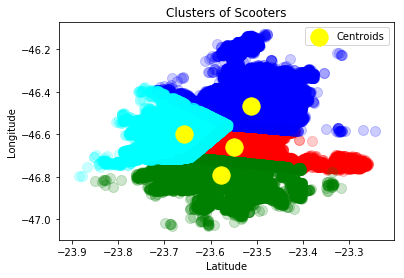

In [43]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', alpha = 0.2)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', alpha = 0.2)
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', alpha = 0.2)
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', alpha = 0.2)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Scooters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

According to this simple model, we should prioritize the scooters' supply near these 4 centroids.

The centroids' coordinates are:

In [44]:
c_open4

array([[-23.5491656 , -46.65858783],
       [-23.51254269, -46.46472775],
       [-23.57789494, -46.79019634],
       [-23.65630857, -46.59957446]])

### Problem Two: Where will the user leave the scooter after using it?

Doing the same with the df_rides dataset:

In [45]:
df_rides20 = df_rides.sample(frac=0.2)
X2 = df_rides20[['dest_lat', 'dest_lng']].values

In [46]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0,
                   n_jobs = -1)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

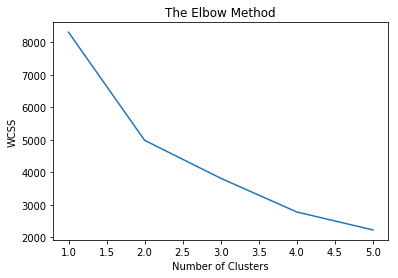

In [47]:
plt.plot(range(1,6), wcss)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

We get exactly the same result as before. Let's try with 2 and 4 clusters:

In [48]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', 
                max_iter = 300, n_init = 10, 
                random_state = 0, n_jobs = -1)
y_kmeans2 = kmeans.fit_predict(X2)

c_park2 = kmeans.cluster_centers_

Visualising the clusterings:

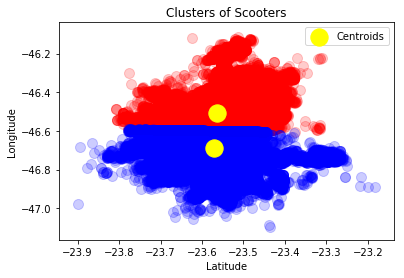

In [49]:
plt.scatter(X2[y_kmeans2 == 0,0], X2[y_kmeans2 == 0,1], s = 100, c = 'red', alpha = 0.2)
plt.scatter(X2[y_kmeans2 == 1,0], X2[y_kmeans2 == 1,1], s = 100, c = 'blue', alpha = 0.2)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Scooters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

This seems quite similar to the graph we obtained before, is it?

In [50]:
print('The centroids obtained with the coordinates of destination are')
print(c_park2)

The centroids obtained with the coordinates of destination are
[[-23.56324794 -46.50962467]
 [-23.57043906 -46.68779302]]


In [51]:
print('Meanwhile the ones obtained with the coordinates of open app are:') 
print(c_open2)

Meanwhile the ones obtained with the coordinates of open app are:
[[-23.5621165  -46.51410165]
 [-23.57156163 -46.68651606]]


The centroids are slightly different, but, we may say they are the same. 

Now with 4 clusters:

In [52]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', 
                max_iter = 300, n_init = 10, 
                random_state = 0, n_jobs = -1)
y_kmeans4 = kmeans.fit_predict(X2)

c_park4 = kmeans.cluster_centers_

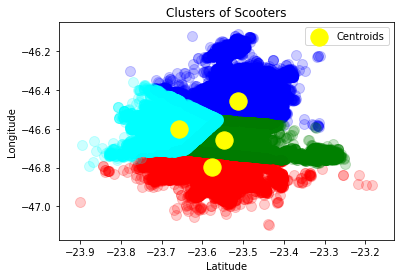

In [53]:
plt.scatter(X2[y_kmeans4 == 0,0], X2[y_kmeans4 == 0,1], s = 100, c = 'red', alpha = 0.2)
plt.scatter(X2[y_kmeans4 == 1,0], X2[y_kmeans4 == 1,1], s = 100, c = 'blue', alpha = 0.2)
plt.scatter(X2[y_kmeans4 == 2,0], X2[y_kmeans4 == 2,1], s = 100, c = 'green', alpha = 0.2)
plt.scatter(X2[y_kmeans4 == 3,0], X2[y_kmeans4 == 3,1], s = 100, c = 'cyan', alpha = 0.2)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Scooters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

Again, this seems pretty similar as the results obtained before, are they?

In [54]:
print('The centroids obtained with the coordinates of destination are')
print(c_park4)

The centroids obtained with the coordinates of destination are
[[-23.57590727 -46.79460118]
 [-23.51322488 -46.45724491]
 [-23.54629631 -46.65730981]
 [-23.65694513 -46.5984216 ]]


In [55]:
print('Meanwhile the ones obtained with the coordinates of open app are:') 
print(c_open4)

Meanwhile the ones obtained with the coordinates of open app are:
[[-23.5491656  -46.65858783]
 [-23.51254269 -46.46472775]
 [-23.57789494 -46.79019634]
 [-23.65630857 -46.59957446]]


Again the centroids are almost equal.

## Conclusions

Since we got the same results from both datasets we have to conclude that everytime a user opens the app there's a scooter nearby and is very likely he/she will use it to go to his/her destination and then he/she will use it again to comeback to the same place of his/her departure. Only those circumstances could explain why the optimal spot to place the scooters to maximize their probability of being used is the same spot where the users leave the scooter after using it. I daresay the problem of where to place the scooters according to the user's demand has already been solved in August 2018 and that's why the number of rides and profit of the company increased so drastically.    